In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\arups\\OneDrive\\Desktop\\COLLECTION\\PROGRAMS\\TEST_CSVs\\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.iloc[: , 2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
223,60,102000,1
1,35,20000,0
143,30,89000,0
135,23,63000,0
280,59,88000,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased' , axis = 1) , df['Purchased'] , test_size = 0.3 , random_state = 0)

In [6]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) # scaler.transform(X_train) returns a Numpy array
X_test_scaled = scaler.transform(X_test) # Here fit() not applied because be calculating mean_ and std_ from X_train data
                                         # We again not calculate this we just apply formula to every data points


In [8]:
scaler.mean_


array([3.78642857e+01, 6.98071429e+04])

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [10]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


## Differences

In [11]:
# To prove that after scaling the Mean is = 0 and Standard Deviation is = 1
np.round(X_train.describe() , 1)
np.round(X_train_scaled.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


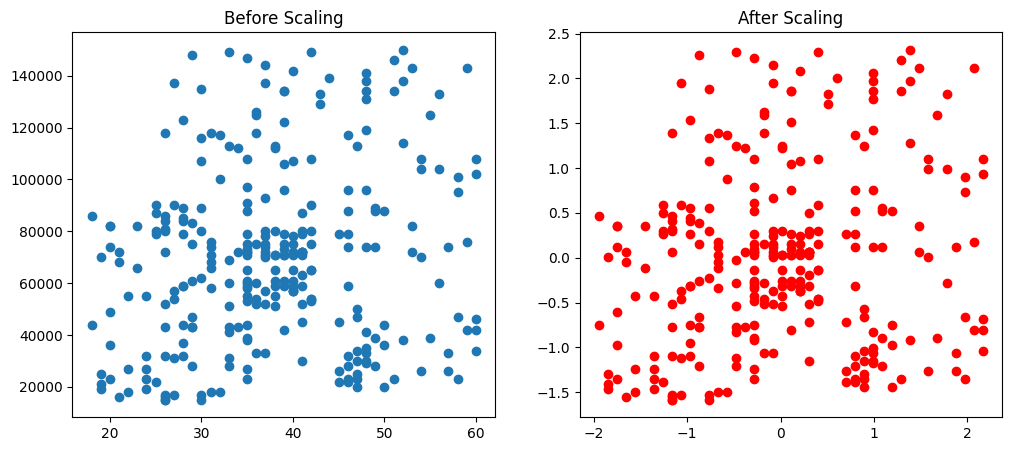

In [12]:
import matplotlib.pyplot as plt

fig , (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

plt.show()


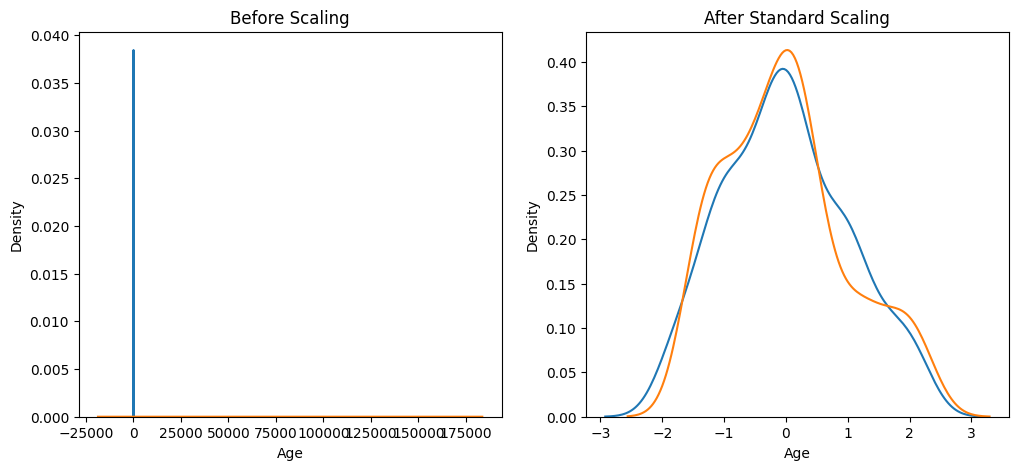

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

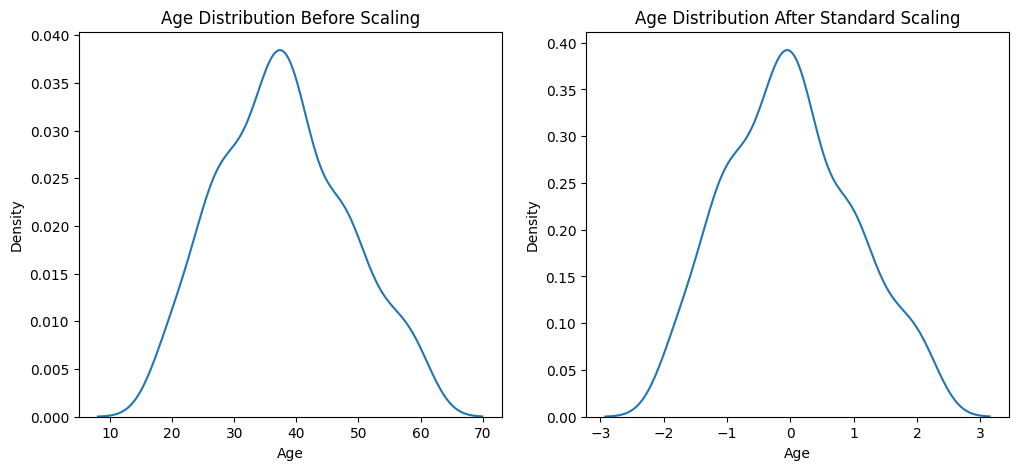

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
#  sns.kdeplot() plots the kernel density estimation of the 'Age' column from X_train_scaled on the second subplot (ax2).
plt.show()

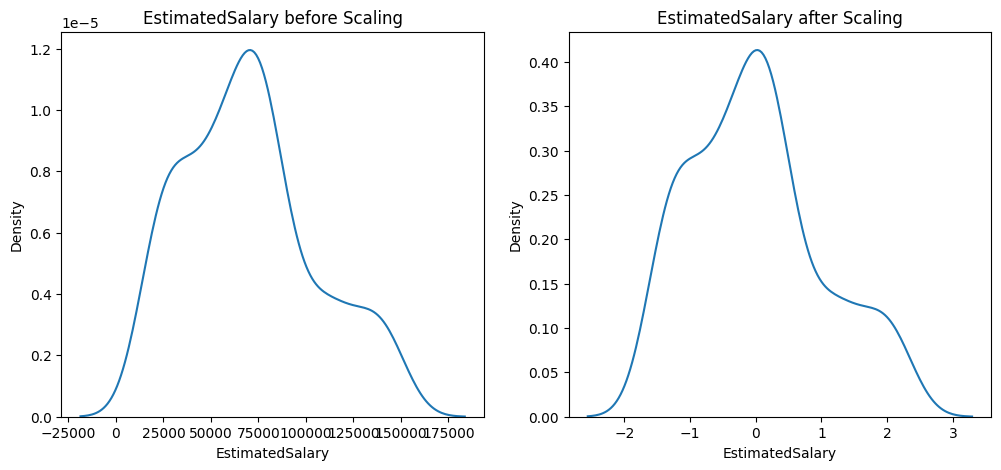

In [15]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12,5))

ax1.set_title('EstimatedSalary before Scaling')
sns.kdeplot(X_train['EstimatedSalary'] , ax = ax1)
ax2.set_title('EstimatedSalary after Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'] , ax = ax2)

plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

lr_unscaled = LogisticRegression()
lr_scaled = LogisticRegression()

lr_unscaled.fit(X_train , y_train)
lr_scaled.fit(X_train_scaled , y_train)

LogisticRegression()

In [17]:
y_pred_unscaled = lr_unscaled.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print('Actual :' , accuracy_score(y_test , y_pred_unscaled ))
print('Scaled :' , accuracy_score(y_test , y_pred_scaled ))

Actual : 0.6583333333333333
Scaled : 0.8666666666666667


In [20]:
# Sometimes scaling does not effect in certain algorithm
from sklearn.tree import DecisionTreeClassifier

dt_unscaled = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt_unscaled.fit(X_train , y_train)
dt_scaled.fit(X_train_scaled , y_train)

DecisionTreeClassifier()

In [21]:
y_pred_unscaled = dt_unscaled.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [22]:
print('Actual :' , accuracy_score(y_test , y_pred_unscaled ))
print('Scaled :' , accuracy_score(y_test , y_pred_scaled ))
# Here Actual and Scaled both answer is same

Actual : 0.875
Scaled : 0.8666666666666667


In [23]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [24]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [25]:
new_df = pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 25000, 35000], 'Purchased': [0, 1, 1]})

df = pd.concat([df, new_df])

df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,1000,0
1,90,25000,1


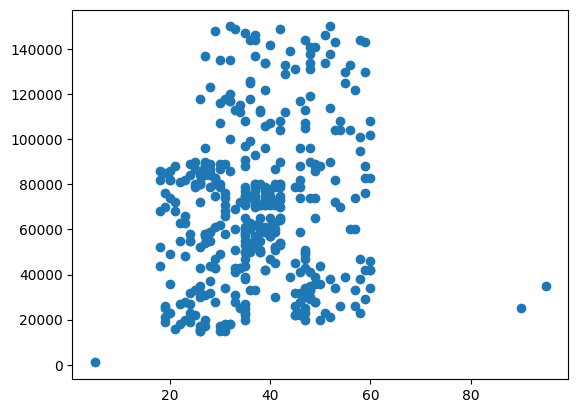

In [26]:
plt.scatter(df['Age'] , df['EstimatedSalary'])
plt.show()

In [32]:
X_train , X_test , y_train , y_test = train_test_split(df.drop('Purchased' , axis = 1) , df['Purchased'] , test_size = 0.33)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

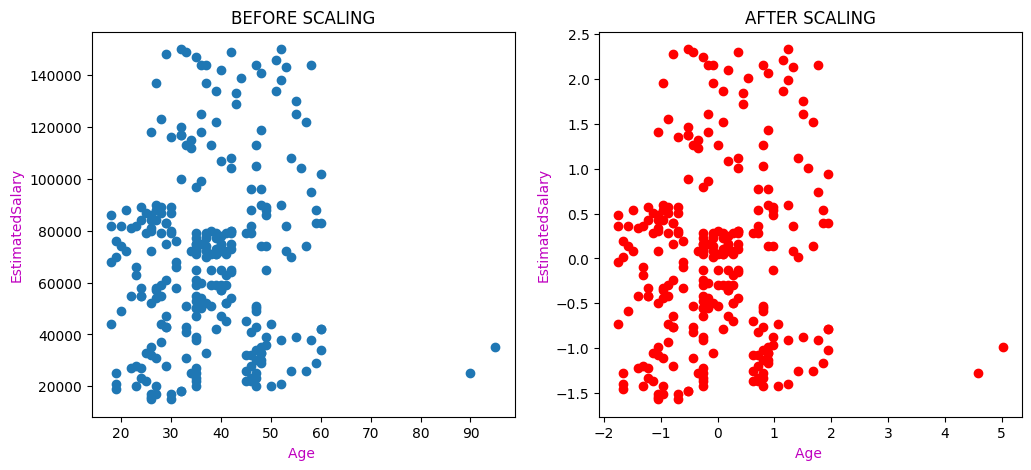

In [40]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12,5))

ax1.scatter(X_train['Age'] , X_train['EstimatedSalary'])
ax1.set_xlabel('Age ' , color = 'm')
ax1.set_ylabel('EstimatedSalary' , color = 'm')
ax1.set_title('BEFORE SCALING')
ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'] , color = 'r')
ax2.set_xlabel('Age ' , color = 'm')
ax2.set_ylabel('EstimatedSalary' , color = 'm')
ax2.set_title('AFTER SCALING')
plt.show()